
# Download necessary packages

In [9]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip install transformers
!pip install nltk
!pip install sklearn
!pip install gensim
!pip install torch
!pip install scikit-learn
!pip install gensim
!pip install torch

In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt') # download the necessary tokenizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords') # download the necessary stop words
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import string
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW
import torch
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
import random
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iness\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iness\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iness\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


RuntimeError: Failed to import transformers.optimization because of the following error (look up to see its traceback):
module 'numpy' has no attribute 'typeDict'

# Data Loading

In [3]:
!git clone https://github.com/inesfrsantos/NLP


fatal: destination path 'NLP' already exists and is not an empty directory.


In [4]:
#Load bumble data
bumble = pd.read_csv('./NLP/Data Sources/Tinder_reviews.zip')

In [5]:
#Load Tinder Data
with zipfile.ZipFile("./NLP/Data Sources/Tinder_reviews.zip", "r") as zip_ref:
    # Replace "path/to/your/file.csv" with the path to your CSV file within the ZIP archive
    with zip_ref.open("tinder_google_play_reviews.csv") as csv_file:
        # Load the CSV data into a Pandas DataFrame
        tinder = pd.read_csv(csv_file)

# Exploratory Data Analysis

In [6]:
# Check the bumble data
bumble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584667 entries, 0 to 584666
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              584667 non-null  object
 1   userName              584663 non-null  object
 2   userImage             584667 non-null  object
 3   content               583329 non-null  object
 4   score                 584667 non-null  int64 
 5   thumbsUpCount         584667 non-null  int64 
 6   reviewCreatedVersion  463732 non-null  object
 7   at                    584667 non-null  object
 8   replyContent          47121 non-null   object
 9   repliedAt             47121 non-null   object
 10  appVersion            463732 non-null  object
dtypes: int64(2), object(9)
memory usage: 49.1+ MB


In [7]:
# Check the tinder data
tinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584667 entries, 0 to 584666
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              584667 non-null  object
 1   userName              584663 non-null  object
 2   userImage             584667 non-null  object
 3   content               583329 non-null  object
 4   score                 584667 non-null  int64 
 5   thumbsUpCount         584667 non-null  int64 
 6   reviewCreatedVersion  463732 non-null  object
 7   at                    584667 non-null  object
 8   replyContent          47121 non-null   object
 9   repliedAt             47121 non-null   object
 10  appVersion            463732 non-null  object
dtypes: int64(2), object(9)
memory usage: 49.1+ MB


In [8]:
# Check the first rows of each the bumble data
bumble.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,701f6eba-bd35-4d2e-8812-b7ba889c9204,Ricardo Morales,https://play-lh.googleusercontent.com/a-/ACB-R...,People use tinder to promote their IGs,1,0,14.7.0,2023-05-05 01:05:07,NaN,NaN,14.7.0
1,a551c9d2-d5d6-42df-80dd-3c3c0eb60766,This Man,https://play-lh.googleusercontent.com/a-/ACB-R...,Worst dating app,1,0,NaN,2023-05-05 00:59:39,NaN,NaN,NaN
2,f42dc157-ba8d-4957-820e-d73f1797bf1c,Mehul Shah,https://play-lh.googleusercontent.com/a-/ACB-R...,Good...,5,0,14.7.0,2023-05-05 00:38:48,NaN,NaN,14.7.0
3,9af363bc-d8ce-44b4-baf9-8f038beffe07,Adam Shehata,https://play-lh.googleusercontent.com/a/AGNmyx...,This is actually the worst dating app ever. Tr...,1,0,NaN,2023-05-05 00:34:06,NaN,NaN,NaN
4,e1446b4b-0a87-4822-84f8-5cc406a9a7aa,Miguel Alvarez,https://play-lh.googleusercontent.com/a/AGNmyx...,it's alright,2,0,14.7.0,2023-05-05 00:32:41,NaN,NaN,14.7.0


In [9]:
#Check the first rows of the tinder data
tinder.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,701f6eba-bd35-4d2e-8812-b7ba889c9204,Ricardo Morales,https://play-lh.googleusercontent.com/a-/ACB-R...,People use tinder to promote their IGs,1,0,14.7.0,2023-05-05 01:05:07,NaN,NaN,14.7.0
1,a551c9d2-d5d6-42df-80dd-3c3c0eb60766,This Man,https://play-lh.googleusercontent.com/a-/ACB-R...,Worst dating app,1,0,NaN,2023-05-05 00:59:39,NaN,NaN,NaN
2,f42dc157-ba8d-4957-820e-d73f1797bf1c,Mehul Shah,https://play-lh.googleusercontent.com/a-/ACB-R...,Good...,5,0,14.7.0,2023-05-05 00:38:48,NaN,NaN,14.7.0
3,9af363bc-d8ce-44b4-baf9-8f038beffe07,Adam Shehata,https://play-lh.googleusercontent.com/a/AGNmyx...,This is actually the worst dating app ever. Tr...,1,0,NaN,2023-05-05 00:34:06,NaN,NaN,NaN
4,e1446b4b-0a87-4822-84f8-5cc406a9a7aa,Miguel Alvarez,https://play-lh.googleusercontent.com/a/AGNmyx...,it's alright,2,0,14.7.0,2023-05-05 00:32:41,NaN,NaN,14.7.0


In [10]:
# Check missing values
bumble.isnull().sum()

reviewId                     0
userName                     4
userImage                    0
content                   1338
score                        0
thumbsUpCount                0
reviewCreatedVersion    120935
at                           0
replyContent            537546
repliedAt               537546
appVersion              120935
dtype: int64

In [11]:
# Check missing values
tinder.isnull().sum()

reviewId                     0
userName                     4
userImage                    0
content                   1338
score                        0
thumbsUpCount                0
reviewCreatedVersion    120935
at                           0
replyContent            537546
repliedAt               537546
appVersion              120935
dtype: int64

In [12]:
# check the value count for ratings
print(bumble['score'].value_counts())
print(tinder['score'].value_counts())

1    231164
5    198607
4     68165
3     45460
2     41270
0         1
Name: score, dtype: int64
1    231164
5    198607
4     68165
3     45460
2     41270
0         1
Name: score, dtype: int64


In [13]:
# check 0 score for Tinder
tinder[tinder['score']==0]

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
334053,bd305121-44f4-4dce-8d9b-3e324edccaef,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love it but ...my match is not replying its a ...,0,0,9.0.0,2018-05-27 18:15:34,NaN,NaN,9.0.0


In [14]:
# delete score 0 row
tinder = tinder[tinder['score']!=0]

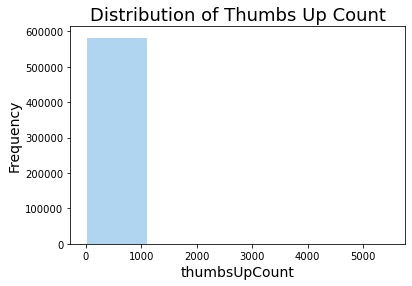

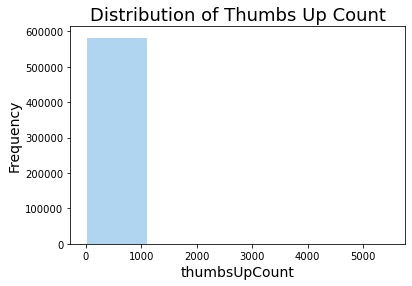

In [15]:
# Check the distribution of the thumbsupcount variable for bumble
fig, ax = plt.subplots()
ax.hist(bumble["thumbsUpCount"], bins=5, color="#afd5f0", edgecolor="white")
ax.set_xlabel("thumbsUpCount", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Thumbs Up Count", fontsize=18)
plt.show()


# Check the distribution of the thumbsupcount variable for tinder
fig, ax = plt.subplots()
ax.hist(tinder["thumbsUpCount"], bins=5, color="#afd5f0", edgecolor="white")
ax.set_xlabel("thumbsUpCount", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Thumbs Up Count", fontsize=18)
plt.show()

In [16]:
target_col = "score"

# Define the values in the "score" column
score_values = np.arange(1, 6)  # Assuming scores range from 1 to 5

# Plot the distribution of the target variable for Bumble
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(bumble[target_col], bins=5, color="#ffe28e", edgecolor="white")
ax.set_xlabel(target_col, fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Star Ratings in Bumble App Reviews", fontsize=18)
ax.set_xticks(score_values)
ax.set_xticklabels(score_values)

# Label each bar with its frequency value
for count, patch in zip(counts, patches):
    x = patch.get_x() + patch.get_width() / 2
    y = count
    ax.text(x, y, str(int(count)), ha='center', va='bottom')

plt.show()

# Plot the distribution of the target variable for Tinder
fig, ax = plt.subplots()
counts, bins, patches = ax.hist(tinder[target_col], bins=5, color="#ff6961", edgecolor="white")
ax.set_xlabel(target_col, fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.set_title("Distribution of Star Ratings in Tinder App Reviews", fontsize=18)
ax.set_xticks(score_values)
ax.set_xticklabels(score_values)

# Label each bar with its frequency value
for count, patch in zip(counts, patches):
    x = patch.get_x() + patch.get_width() / 2
    y = count
    ax.text(x, y, str(int(count)), ha='center', va='bottom')

plt.show()

NameError: name 'np' is not defined

In [17]:
# Check the maximum and minimum dates in the 'at' column of the Tinder dataset
tinder_max_date = tinder['at'].max()
tinder_min_date = tinder['at'].min()

# Check the maximum and minimum dates in the 'at' column of the Bumble dataset
bumble_max_date = bumble['at'].max()
bumble_min_date = bumble['at'].min()

# Print the results
print("Tinder Dataset:")
print("Maximum Date:", tinder_max_date)
print("Minimum Date:", tinder_min_date)
print()
print("Bumble Dataset:")
print("Maximum Date:", bumble_max_date)
print("Minimum Date:", bumble_min_date)

Tinder Dataset:
Maximum Date: 2023-05-05 01:05:07
Minimum Date: 2013-07-15 21:07:56

Bumble Dataset:
Maximum Date: 2023-05-05 01:05:07
Minimum Date: 2013-07-15 21:07:56


From the analysis above we can see that both datasets have the same number of columns and the same column names. Hence we will be merging the datasets. 

Furthermore as the most important column in our analysis is the "content", which contains the text to be analysed, we will be removing the rows that have null values for it, and the columns that will not be used. 

Additionally, some formatting in the tables will be conducted as well, such as lowering column names and other pre-processing needed before doing our modelling. 

Lastly, we will remove some of the data so both datasets are within the same period more or less.

# Pre-Processing

In [18]:
# Convert at to datetime
tinder['at'] = pd.to_datetime(tinder['at'])
bumble['at'] = pd.to_datetime(bumble['at'])

In [19]:
# Filter Tinder dataset to include data from 2015 onwards
tinder = tinder[tinder['at'].dt.year >= 2015]

In [20]:
# Create a new column called "app" and set its values to Bumble and Tinder so we classify it
bumble["app"] = "Bumble"
tinder["app"] = "Tinder"


In [21]:
# Concatenate the two datasets
app_reviews = pd.concat([bumble, tinder])

In [22]:
# Drop the null values for the content column
app_reviews = app_reviews.dropna(subset=['content'])

In [23]:
app_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app
0,701f6eba-bd35-4d2e-8812-b7ba889c9204,Ricardo Morales,https://play-lh.googleusercontent.com/a-/ACB-R...,People use tinder to promote their IGs,1,0,14.7.0,2023-05-05 01:05:07,NaN,NaN,14.7.0,Bumble
1,a551c9d2-d5d6-42df-80dd-3c3c0eb60766,This Man,https://play-lh.googleusercontent.com/a-/ACB-R...,Worst dating app,1,0,NaN,2023-05-05 00:59:39,NaN,NaN,NaN,Bumble
2,f42dc157-ba8d-4957-820e-d73f1797bf1c,Mehul Shah,https://play-lh.googleusercontent.com/a-/ACB-R...,Good...,5,0,14.7.0,2023-05-05 00:38:48,NaN,NaN,14.7.0,Bumble
3,9af363bc-d8ce-44b4-baf9-8f038beffe07,Adam Shehata,https://play-lh.googleusercontent.com/a/AGNmyx...,This is actually the worst dating app ever. Tr...,1,0,NaN,2023-05-05 00:34:06,NaN,NaN,NaN,Bumble
4,e1446b4b-0a87-4822-84f8-5cc406a9a7aa,Miguel Alvarez,https://play-lh.googleusercontent.com/a/AGNmyx...,it's alright,2,0,14.7.0,2023-05-05 00:32:41,NaN,NaN,14.7.0,Bumble


In [24]:
# Remove columns that are not needed
#Select columns
columns_to_remove = ["reviewCreatedVersion", "at", "replyContent", "repliedAt", "appVersion", "userImage", "thumbsUpCount"]

# Drop the specified columns
app_reviews = app_reviews.drop(columns_to_remove, axis=1)


In [25]:
# Lowercase all column names and remove extra whitespaces
app_reviews.columns = app_reviews.columns.map(str.lower).map(str.strip)

In [26]:
# Define a function to clean text
def clean_text(text):
    clean_text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return clean_text

# Apply the clean_text function to the content column
app_reviews['content'] = app_reviews['content'].apply(clean_text)

In [27]:
# create a new column 'tokens' by tokenizing the 'text' column
app_reviews['tokens'] = app_reviews['content'].apply(nltk.word_tokenize)

# convert all tokens to lowercase
app_reviews['tokens'] = app_reviews['tokens'].apply(lambda x: [word.lower() for word in x])


In [28]:
# create a set of stop words
stop_words = set(stopwords.words('english'))

# remove stop words from the 'tokens' column
app_reviews['tokens'] = app_reviews['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [29]:
#Perform Stemming and Lemmatization 
stemmer  = PorterStemmer() # for stemming
lemmatizer  = WordNetLemmatizer() # for lemmatization

In [30]:
# Define a function to apply stemming to a list of tokens
def stem_tokens(tokens):
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

# Define a function to apply lemmatization to a list of tokens
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [31]:
# Apply stemming to a column of tokens in a dataframe
#app_reviews['stemmed_tokens'] = app_reviews['tokens'].apply(stem_tokens)

# Apply lemmatization to a column of tokens in a dataframe
app_reviews['lemmatized_tokens'] = app_reviews['tokens'].apply(lemmatize_tokens)

# LDA

In [32]:
from sklearn.model_selection import GridSearchCV
from gensim.models import LdaModel
from gensim import corpora

# Set the seed value
set_seed = 42

text_corpus = app_reviews['lemmatized_tokens']

In [33]:
# Create dictionary
dictionary = corpora.Dictionary(text_corpus)

In [34]:
# Create bag of words corpus
corpus = [dictionary.doc2bow(doc) for doc in text_corpus]

In [38]:
# Define the range of values for alpha and beta
alpha_values = ['symmetric', 'asymmetric']
beta_values = [0.01, 0.1, 1.0]

In [39]:
best_coherence = -float('inf')
best_model = None
best_alpha = None
best_beta = None

In [ ]:
# Iterate over alpha and beta values
for alpha in alpha_values:
    for beta in beta_values:
        # Train LDA model with current hyperparameters
        lda_model = LdaModel(corpus, num_topics=7, id2word=dictionary, passes=10, alpha=alpha, eta=beta)

        # Calculate coherence score
        coherence_model = CoherenceModel(model=lda_model, texts=text_corpus, dictionary=dictionary, coherence='c_v')
        coherence = coherence_model.get_coherence()

        # Check if the current model has higher coherence score
        if coherence > best_coherence:
            best_coherence = coherence
            best_model = lda_model
            best_alpha = alpha
            best_beta = beta

In [ ]:
# Print the best hyperparameters and model
print("Best Hyperparameters:")
print("Alpha:", best_alpha)
print("Beta:", best_beta)
print("Coherence Score:", best_coherence)